In [1]:
# Importing tools
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay

# Loading Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# EDA (Exploratory Data Analysis)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking if the data is balanced or not
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

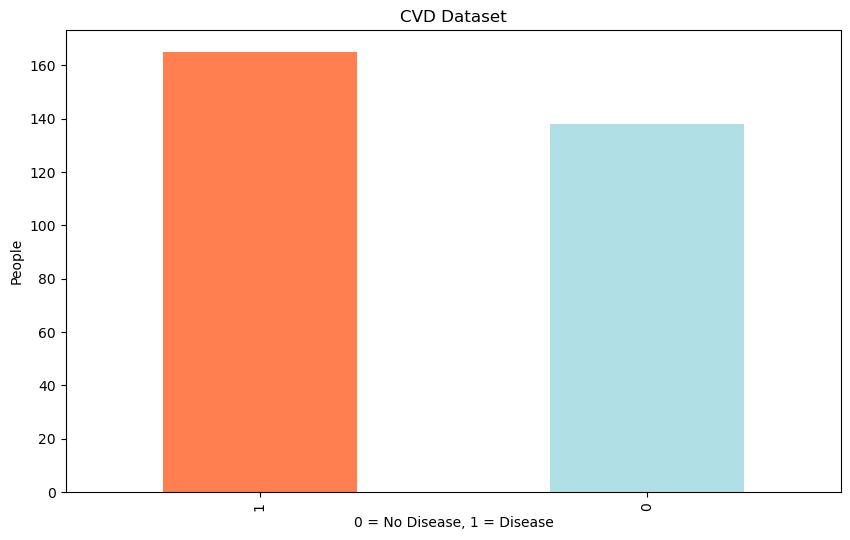

In [5]:
df["target"].value_counts().plot(kind="bar",color=["coral", "powderblue"], figsize=(10, 6))
plt.title("CVD Dataset")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("People");

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### CVD Frequency according to Sex

In [9]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


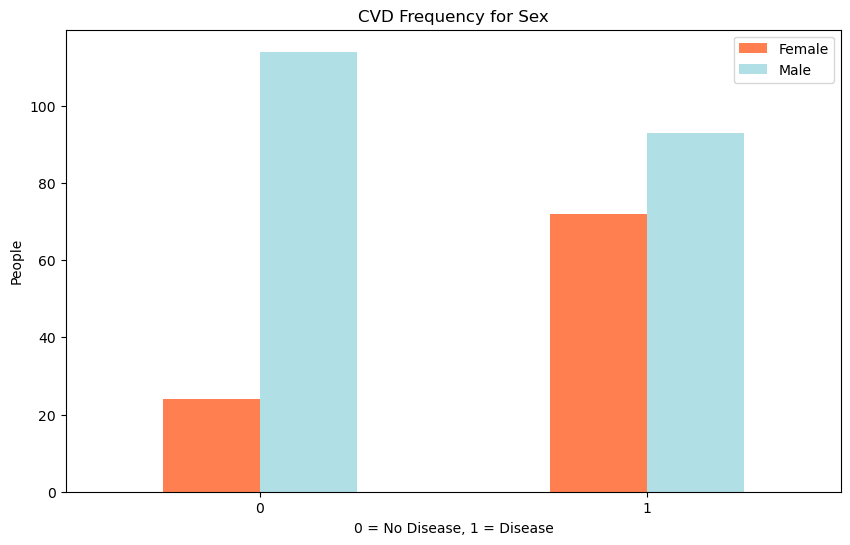

In [11]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                          color=["coral", "powderblue"],
                                          figsize=(10, 6))
plt.title("CVD Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("People")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
plt.savefig("output2", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

### Age vs Max Heart Rate

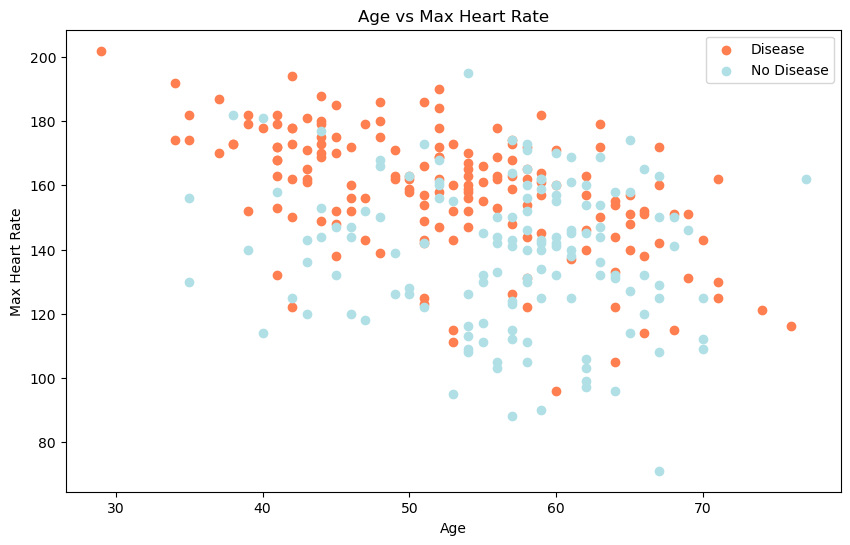

In [12]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
            color=["coral"])

# Scatter with negative examples
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
            color=["powderblue"])

plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
plt.savefig("output3", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

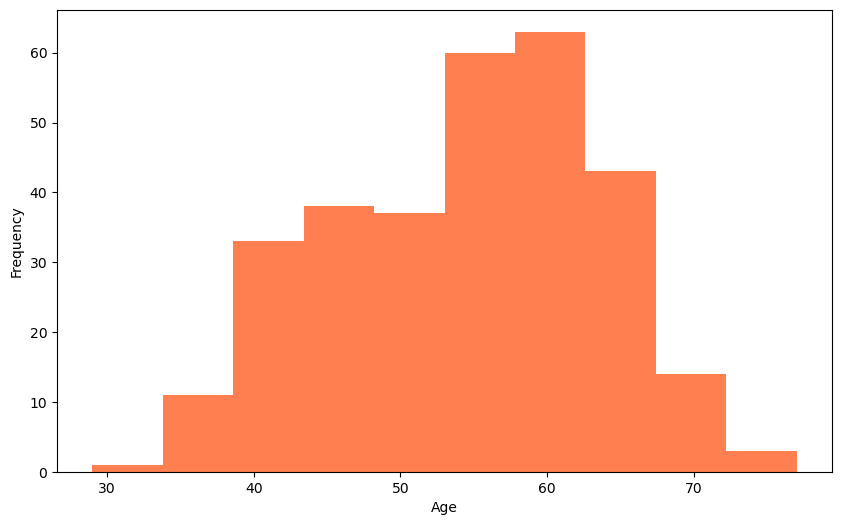

In [13]:
# Distribution of age column
df["age"].plot(kind="hist", figsize=(10, 6), color="coral")
plt.xlabel("Age");
# Right skewded

### CVD Frequency with Chest Pain (cp)

In [14]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


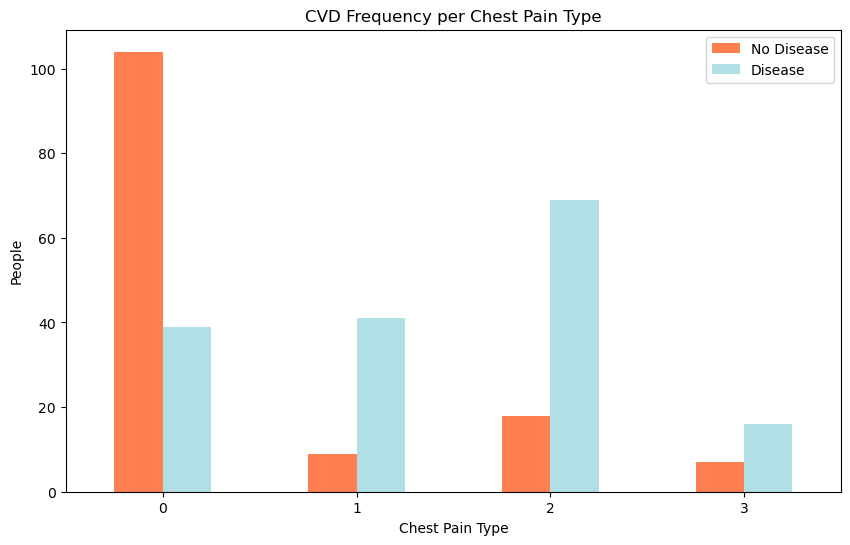

In [15]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                         color=["coral", "powderblue"],
                                         figsize=(10, 6))
plt.title("CVD Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("People")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


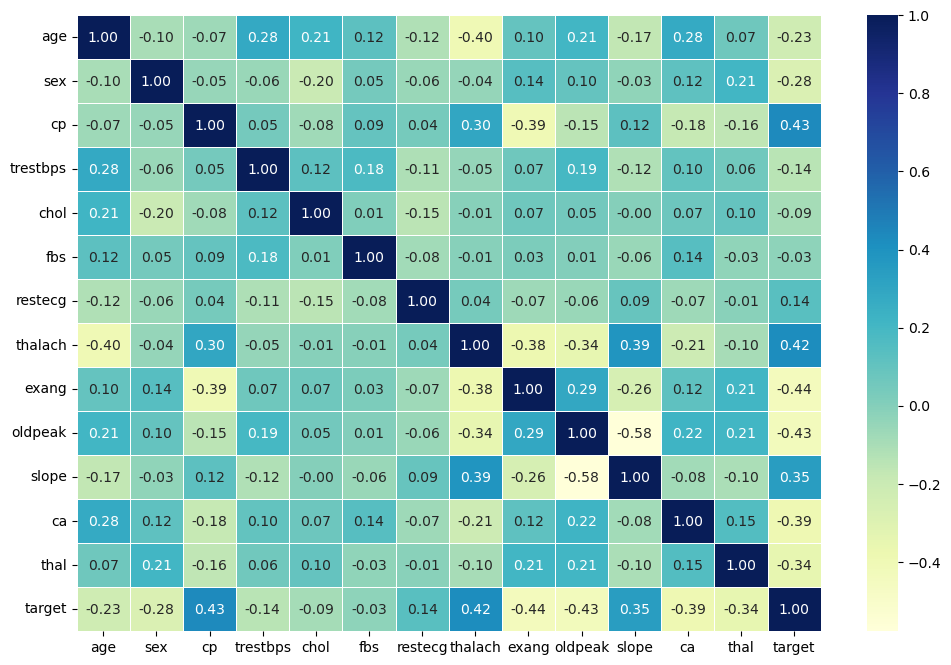

In [18]:
corr_mat = df.corr()
fi, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Modelling

In [19]:
# Splitting data in X and y
X = df.drop("target", axis=1)
y = df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Train-Test split

In [22]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Machine Learning Models Used
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [25]:
# Putting models into a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # Storing model scores in a dictionary
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        # Fit model to the data
        model.fit(X_train, y_train)
        # Evaltuate the model scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [26]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\saura\Desktop\CVD_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

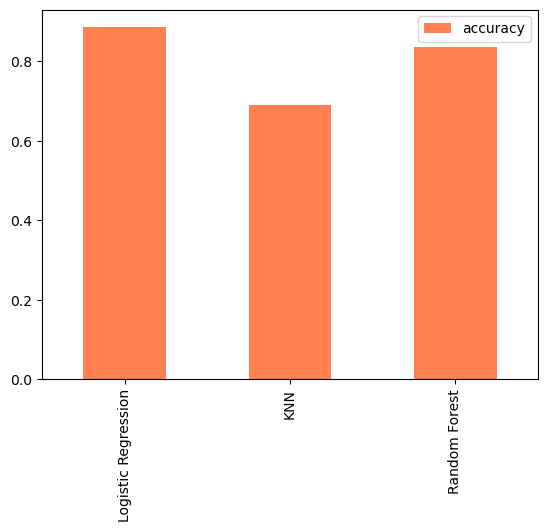

In [27]:
model_comparision = pd.DataFrame(model_scores, index=["accuracy"])
model_comparision.T.plot.bar(color=["coral"]);

## Hyperparameter Tuning with GridSearchCV

### Logistic Regression

In [28]:
np.random.seed(42)

# Hyperparameters for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"],
                'penalty': ['l1', 'l2'],
                'max_iter': [100, 200, 300]
               }

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5)

gs_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [29]:
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating Logistic Regression Model

In [31]:
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

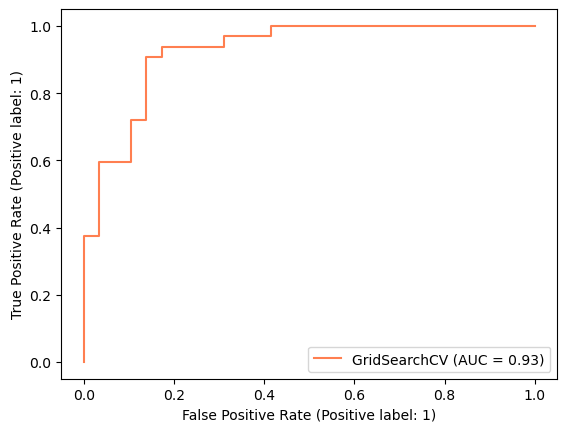

In [33]:
# Plotting ROC curve and calculating AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test,
                               color="coral");

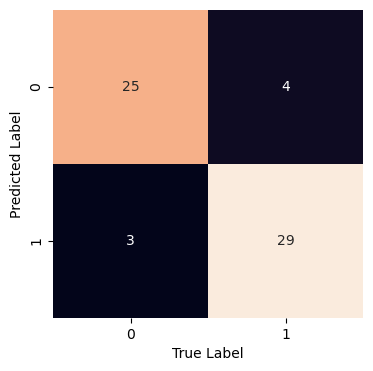

In [34]:
# Confusion Matrix
def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_pred)

In [35]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [36]:
# Calculating evaluation metrics using cross-validation
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [37]:
# Creating new classifier with best parameters
reg_clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear",
                         max_iter=100,
                         penalty="l2")

def cv_metrics_calc(clf, X, y, cv, scoring):
    return {score.title(): np.mean(cross_val_score(clf, X, y, cv=cv, scoring=score)) 
            for score in scoring}

        
metrics = cv_metrics_calc(reg_clf, X, y, cv=5, 
                          scoring=["accuracy", "precision", "recall", "f1"])

cv_metrics = pd.DataFrame(metrics, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


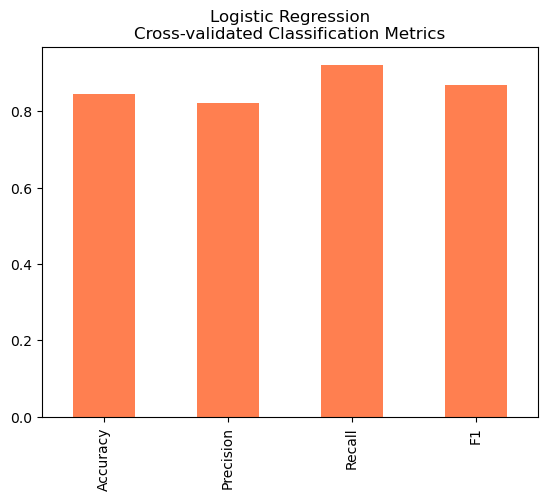

In [38]:
cv_metrics.T.plot.bar(title="Logistic Regression\nCross-validated Classification Metrics", 
                      legend=False, 
                      color=["coral"]);

### Feature Importance (Logistic Regression)

In [39]:
reg_clf.fit(X_train, y_train)
reg_clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(reg_clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

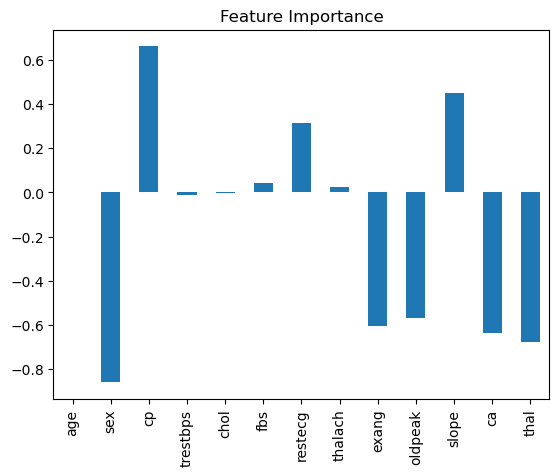

In [42]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### Random Forest Classification Model

In [43]:
# Hyperparameters for Random Forest
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [3, 5, 7, 9],
           'criterion': ['gini', 'entropy']
          }

gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5)

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300]})

In [44]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 300}

In [45]:
gs_rf.best_score_

0.8264455782312924

### Evaluating Random Forest Classification Model

In [46]:
y_pred = gs_rf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

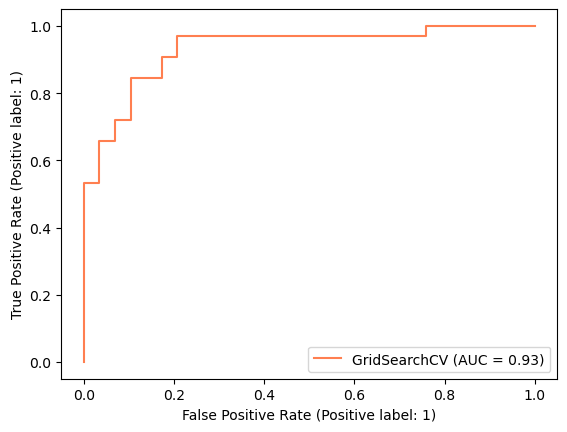

In [48]:
# Plotting ROC curve and calculating AUC metric
RocCurveDisplay.from_estimator(estimator=gs_rf, 
                               X=X_test, 
                               y=y_test, 
                               color="coral");

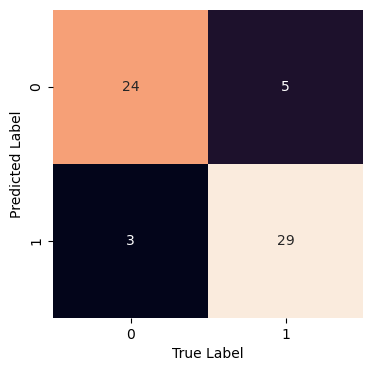

In [49]:
# Confusion Matrix
plot_conf_mat(y_test, y_pred)

In [50]:
# Calculating evaluation metrics using cross-validation
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 300}

In [51]:
# Creating new classifier with best parameters
rf_clf = RandomForestClassifier(criterion="entropy",
                                max_depth=3,
                                n_estimators=100)

        
metrics = cv_metrics_calc(rf_clf, X, y, cv=5, 
                          scoring=["accuracy", "precision", "recall", "f1"])

cv_metrics = pd.DataFrame(metrics, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844809,0.824748,0.89697,0.857536


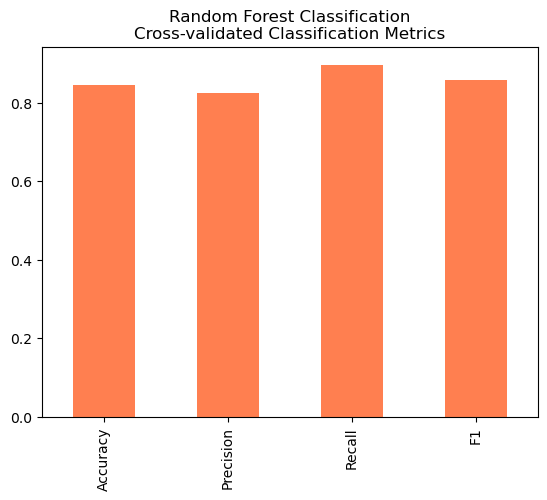

In [52]:
cv_metrics.T.plot.bar(title="Random Forest Classification\nCross-validated Classification Metrics", 
                      legend=False, 
                      color=["coral"]);

### Feature Importance (Random Forest Classifier)

In [53]:
rf_clf.fit(X_train, y_train)
rf_clf.feature_importances_

array([0.05843296, 0.03220446, 0.13125197, 0.02963199, 0.02439942,
       0.00319065, 0.00327506, 0.10013542, 0.09428239, 0.1478762 ,
       0.06385292, 0.17733966, 0.13412689])

In [54]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(rf_clf.feature_importances_)))
feature_dict

{'age': 0.05843295960829578,
 'sex': 0.03220445526824134,
 'cp': 0.13125197260882152,
 'trestbps': 0.02963199421057557,
 'chol': 0.024399420688031692,
 'fbs': 0.003190652223649956,
 'restecg': 0.0032750627014790108,
 'thalach': 0.10013541667240856,
 'exang': 0.09428238794693174,
 'oldpeak': 0.14787620282025807,
 'slope': 0.0638529214792423,
 'ca': 0.1773396631660198,
 'thal': 0.1341268906060448}

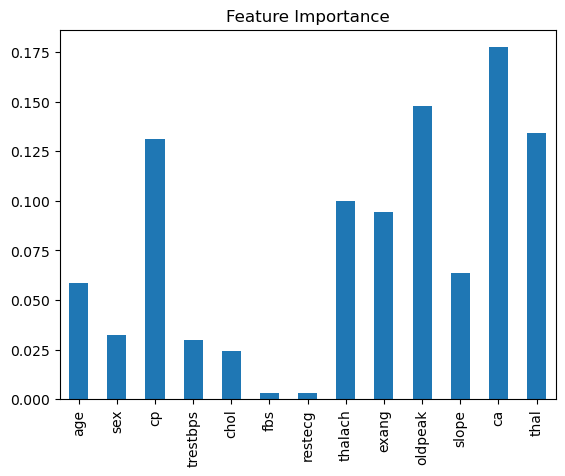

In [55]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### KNN Classifier Model

In [56]:
np.random.seed(42)

# Hyperparameters for KNN
knn_grid = {'n_neighbors': list(range(1, 31)),
            'weights': ['uniform', 'distance'],
            'p': [1, 2],
            'metric': ['euclidean', 'manhattan', 'chebyshev']
           }

gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [57]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [58]:
gs_knn.best_score_

0.7023809523809523

### Evaluating KNN Classification Model

In [59]:
y_pred = gs_knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [60]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

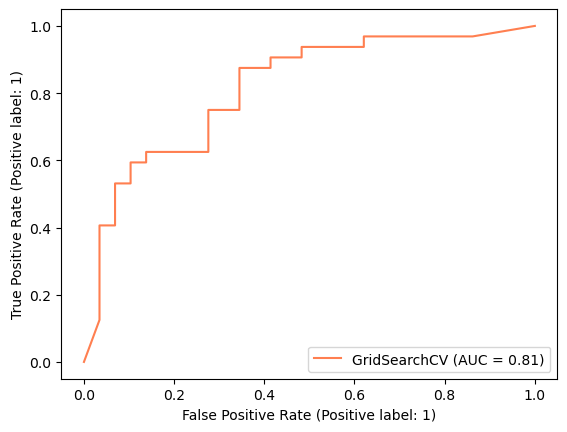

In [61]:
# Plotting ROC curve and calculating AUC metric
RocCurveDisplay.from_estimator(estimator=gs_knn, 
                               X=X_test, 
                               y=y_test, 
                               color="coral");

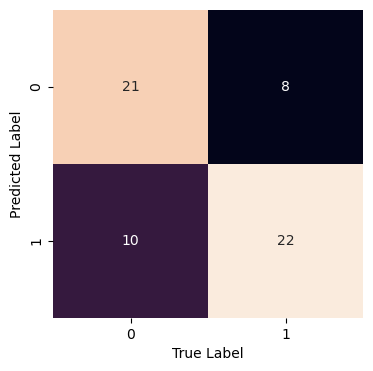

In [62]:
# Confusion Matrix
plot_conf_mat(y_test, y_pred)

In [63]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [64]:
# Calculating evaluation metrics using cross-validation
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [65]:
# Creating new classifier with best parameters
knn_clf = KNeighborsClassifier(metric="manhattan",
                           n_neighbors=7,
                           p=1,
                           weights="distance")

        
metrics = cv_metrics_calc(knn_clf, X, y, cv=5, 
                          scoring=["accuracy", "precision", "recall", "f1"])

cv_metrics = pd.DataFrame(metrics, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.670219,0.683377,0.739394,0.709675


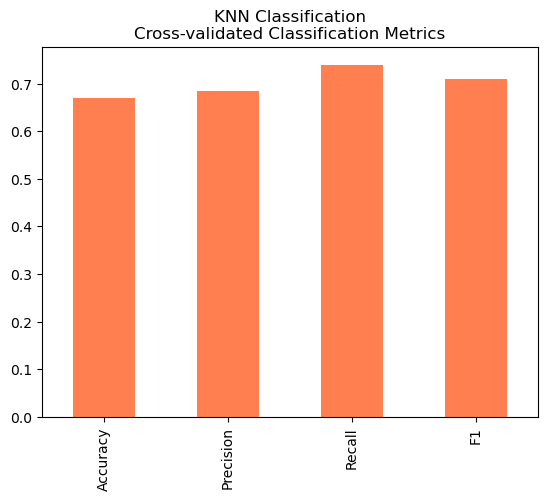

In [66]:
cv_metrics.T.plot.bar(title="KNN Classification\nCross-validated Classification Metrics", 
                      legend=False, color=["coral"]);